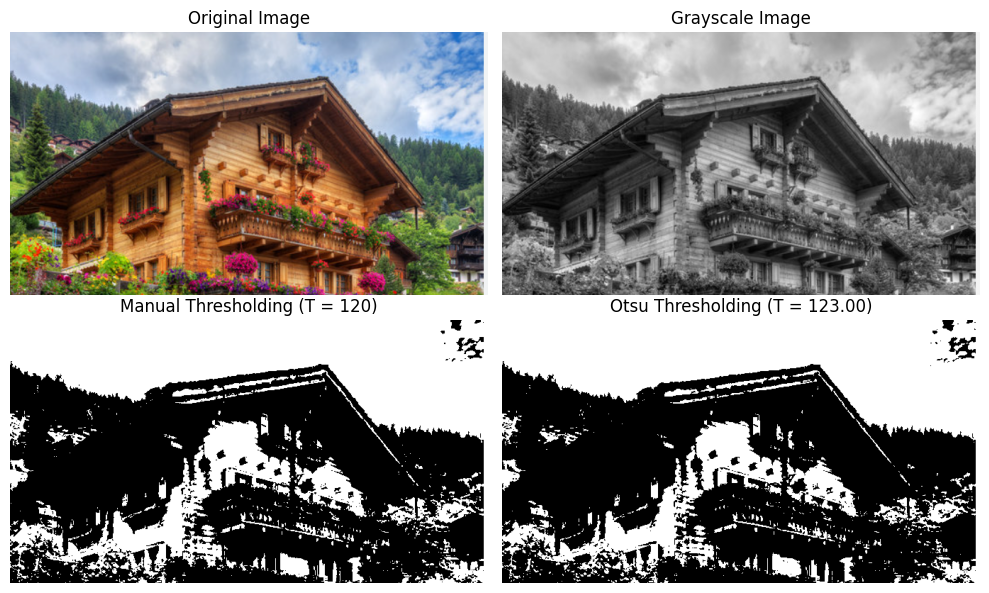

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/Screenshot 2025-12-22 140903.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Task 1: Manual Thresholding
_, manual_thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Task 2: Otsu’s Thresholding
otsu_thresh_value, otsu_thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Display results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Manual Thresholding (T = 120)")
plt.imshow(manual_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title(f"Otsu Thresholding (T = {otsu_thresh_value:.2f})")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


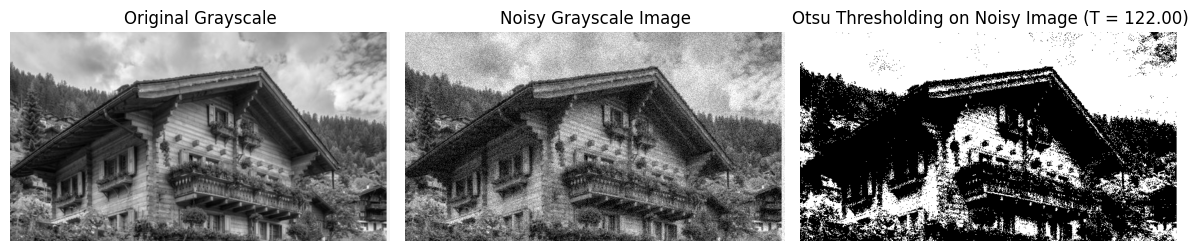

In [5]:
import numpy as np

# Add Gaussian noise to the grayscale image
mean = 0
var = 500
sigma = var**0.5
gauss = np.random.normal(mean, sigma, gray.shape)
noisy_gray = gray + gauss
noisy_gray = np.clip(noisy_gray, 0, 255).astype(np.uint8)

# Apply Otsu's thresholding to the noisy image
otsu_thresh_value_noisy, otsu_thresh_noisy = cv2.threshold(
    noisy_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Grayscale Image")
plt.imshow(noisy_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Otsu Thresholding on Noisy Image (T = {otsu_thresh_value_noisy:.2f})")
plt.imshow(otsu_thresh_noisy, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

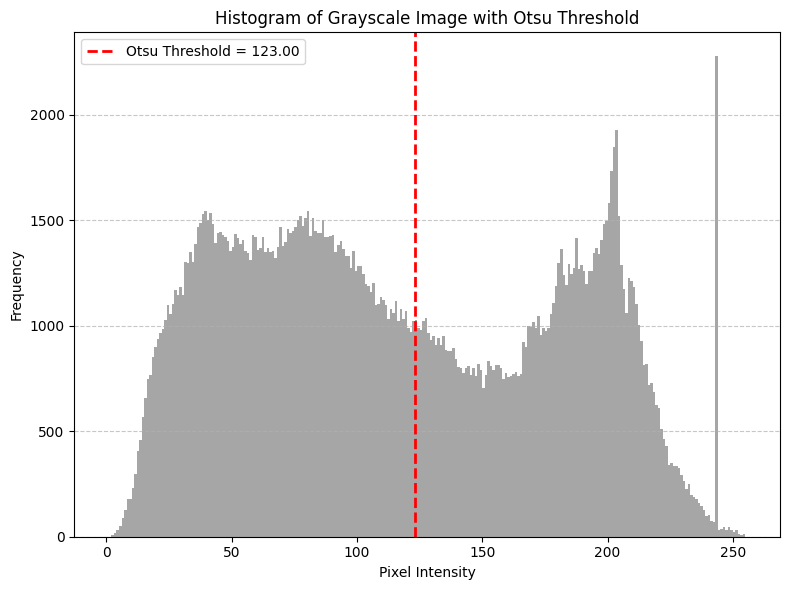

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(gray.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.axvline(x=otsu_thresh_value, color='r', linestyle='--', linewidth=2, label=f'Otsu Threshold = {otsu_thresh_value:.2f}')
plt.title('Histogram of Grayscale Image with Otsu Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

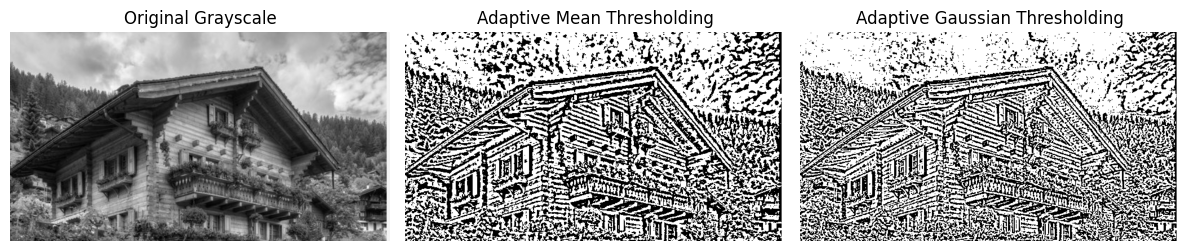

In [8]:
# Adaptive Mean Thresholding
adaptive_mean_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Adaptive Gaussian Thresholding
adaptive_gaussian_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Adaptive Mean Thresholding")
plt.imshow(adaptive_mean_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Adaptive Gaussian Thresholding")
plt.imshow(adaptive_gaussian_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()